numbers of missing data  
hour_of_day       0
day_of_week       0
month             0
holiday           0
weekday           0
summertime        0
temp              0
dew               0
humidity          0
precip            0
snow              0
snowdepth         0
windspeed         0
cloudcover        0
visibility        0
increase_stock    0
dtype: int64


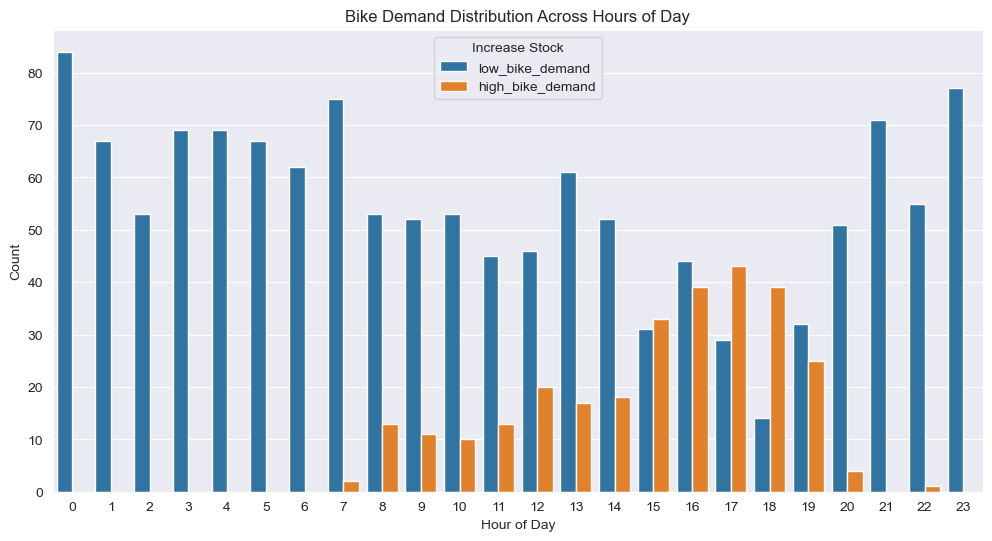

In [115]:
import pandas as pd
data = pd.read_csv('data/training_data_fall2024.csv')
"""Checking for missing values in data"""
print(f"numbers of missing data  \n{data.isnull().sum()}")
"""Nothing missed and there is no outliers"""
# data['holiday'].value_counts()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 data 是您的 DataFrame，包含 'hour_of_day' 和 'increase_stock' 列
# 如果您已经转换了 'hour_of_day'，请使用原始的 'hour_of_day'

# 计算每个小时段内各类别的计数
hourly_counts = data.groupby(['hour_of_day', 'increase_stock']).size().reset_index(name='count')

# 绘制条形图
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_of_day', y='count', hue='increase_stock', data=hourly_counts)
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Bike Demand Distribution Across Hours of Day')
plt.legend(title='Increase Stock')
plt.show()

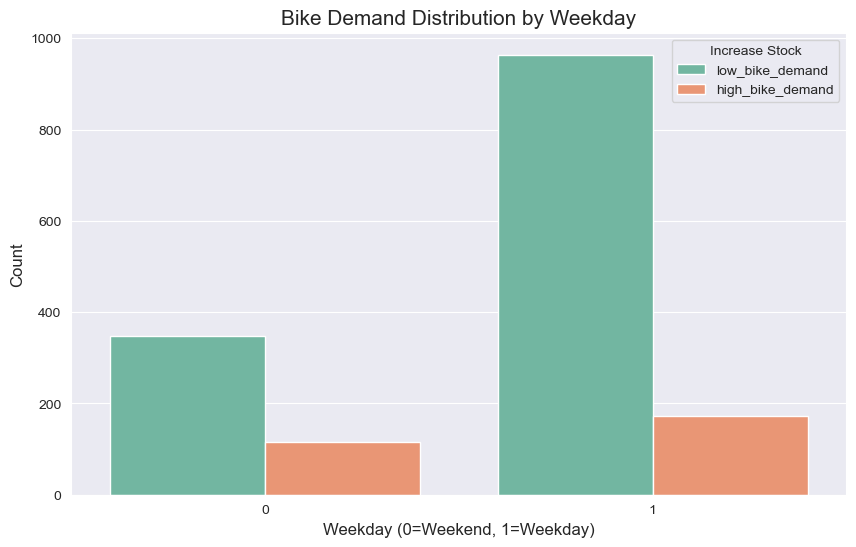

In [116]:

plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', hue='increase_stock', data=data, palette='Set2')

# 添加标签和标题
plt.xlabel('Weekday (0=Weekend, 1=Weekday)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bike Demand Distribution by Weekday', fontsize=15)

# 添加图例
plt.legend(title='Increase Stock')

# 显示图形
plt.show()

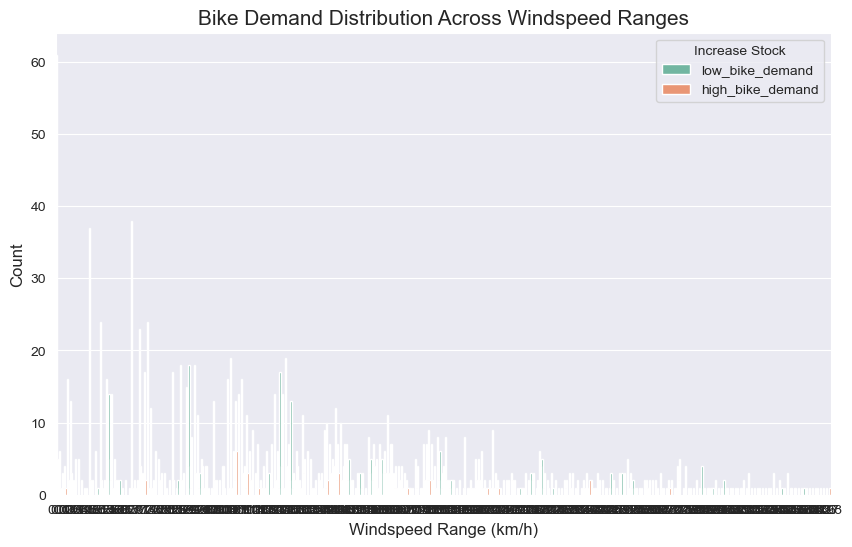

In [117]:

plt.figure(figsize=(10, 6))
sns.countplot(x='windspeed', hue='increase_stock', data=data, palette='Set2')

# 添加标签和标题
plt.xlabel('Windspeed Range (km/h)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bike Demand Distribution Across Windspeed Ranges', fontsize=15)

# 添加图例
plt.legend(title='Increase Stock')

# 显示图形
plt.show()


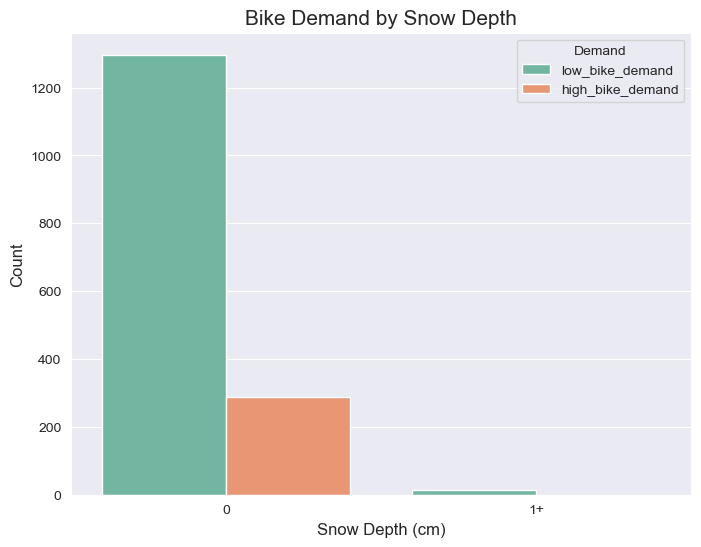

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 创建 snowdepth 的分类特征
bins = [0, 1, data['snowdepth'].max()]
labels = ['0', '1+']
data['snow_bin'] = pd.cut(data['snowdepth'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='snow_bin', hue='increase_stock', data=data, palette='Set2')
plt.xlabel('Snow Depth (cm)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Bike Demand by Snow Depth', fontsize=15)
plt.legend(title='Demand')
plt.show()


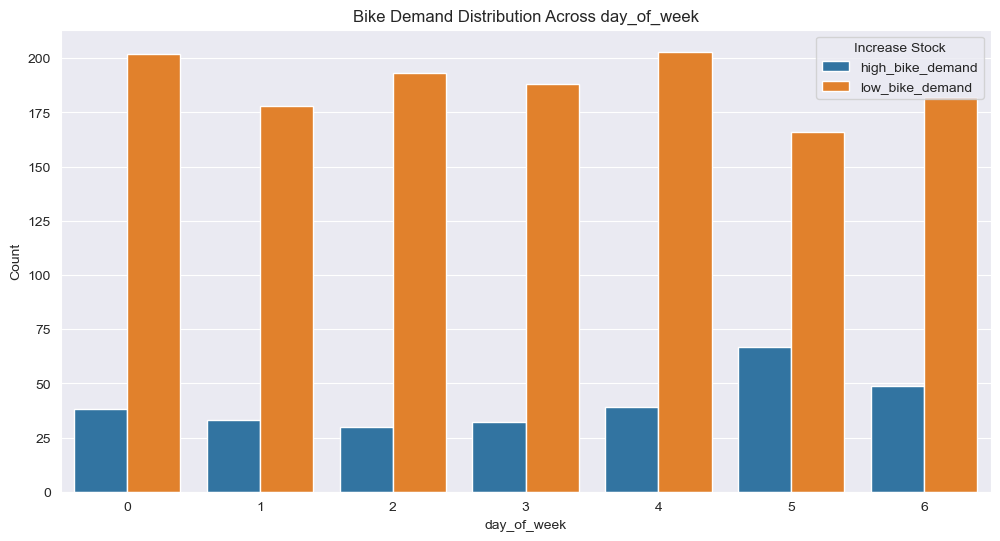

In [119]:
# 计算每个小时段内各类别的计数
hourly_counts = data.groupby(['day_of_week', 'increase_stock']).size().reset_index(name='count')

# 绘制条形图
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='count', hue='increase_stock', data=hourly_counts)
plt.xlabel('day_of_week')
plt.ylabel('Count')
plt.title('Bike Demand Distribution Across day_of_week')
plt.legend(title='Increase Stock')
plt.show()

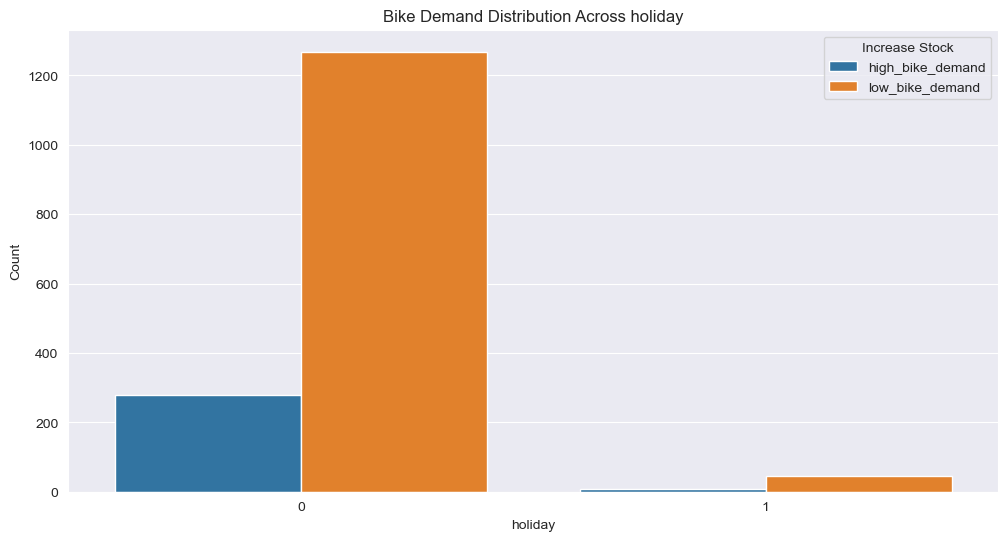

In [120]:
# 计算每个小时段内各类别的计数
hourly_counts = data.groupby(['holiday', 'increase_stock']).size().reset_index(name='count')
# 绘制条形图
plt.figure(figsize=(12, 6))
sns.barplot(x='holiday', y='count', hue='increase_stock', data=hourly_counts)
plt.xlabel('holiday')
plt.ylabel('Count')
plt.title('Bike Demand Distribution Across holiday')
plt.legend(title='Increase Stock')
plt.show()

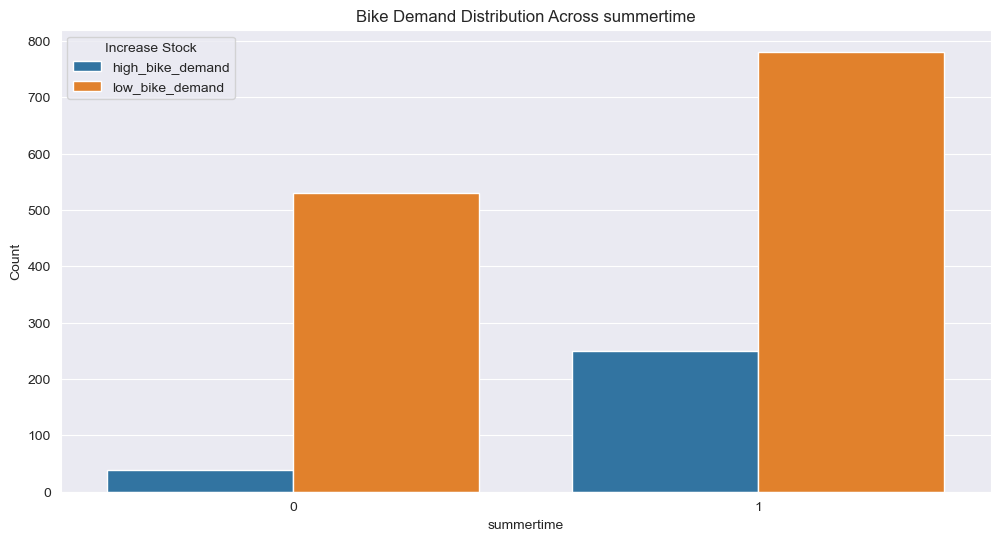

In [121]:
# 计算每个小时段内各类别的计数
hourly_counts = data.groupby(['summertime', 'increase_stock']).size().reset_index(name='count')
# 绘制条形图
plt.figure(figsize=(12, 6))
sns.barplot(x='summertime', y='count', hue='increase_stock', data=hourly_counts)
plt.xlabel('summertime')
plt.ylabel('Count')
plt.title('Bike Demand Distribution Across summertime')
plt.legend(title='Increase Stock')
plt.show()

In [122]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def process_time_data_scale(data):
    data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
    data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

    data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
    data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

    # data['hour_of_day_sin'] = np.sin(2 * np.pi * data['hour_of_day'] / 24)
    # data['hour_of_day_cos'] = np.cos(2 * np.pi * data['hour_of_day'] / 24)
    
    data['peak_hour'] = np.where((data['hour_of_day'] >= 6) & (data['hour_of_day'] <= 22), 1, 0)
    data = data.drop(columns=['month', 'day_of_week', 'hour_of_day',], axis=1)
    # numeric_features = data.drop(['weekday', 'holiday'], axis=1)
    numeric_features = data.drop(['holiday', 'weekday', 'peak_hour'], axis=1)
    scaler = StandardScaler()
    numeric_data = pd.DataFrame(scaler.fit_transform(numeric_features),
                                columns=numeric_features.columns,
                                index=numeric_features.index)
    # return pd.concat([data[['weekday', 'holiday']], numeric_data], axis=1)
    return pd.concat([data[['holiday', 'weekday', 'peak_hour']], numeric_data], axis=1)
numeric_data_new = data.select_dtypes(include=['float64', 'int64'])
numeric_data_new = numeric_data_new.drop(columns=['snow','precip'])
numerical_new = process_time_data_scale(numeric_data_new)
numerical_new 

,holiday,weekday,peak_hour,summertime,temp,dew,humidity,snowdepth,windspeed,cloudcover,visibility,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,0,0,0,-1.344254,-2.419627,-2.269781,-0.537283,-0.101439,0.414935,-0.999503,0.282338,0.678434,1.227255,-1.356549,-0.310979
1,0,1,1,-1.344254,-1.782607,-2.050293,-1.203654,-0.101439,1.395045,0.652979,0.282338,0.678434,1.227255,-0.586476,-1.264846
2,0,1,1,0.743907,1.262128,1.401656,0.496090,-0.101439,-1.687144,0.512472,0.282338,-1.259495,-0.699517,0.648624,-1.264846
3,0,0,0,-1.344254,-1.307542,-1.172340,-0.219564,-0.101439,0.788924,-1.964724,0.282338,0.678434,1.227255,-1.081713,0.878475
4,0,1,1,-1.344254,-0.379006,-1.910618,-2.370721,-0.101439,-0.333044,-0.602419,0.282338,1.387764,0.005730,0.031074,1.407831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0,0,0.743907,0.679093,1.162214,1.245299,-0.101439,-0.320148,-1.219427,0.282338,-0.030897,-1.404765,-1.356549,-0.310979
1596,0,1,1,0.743907,0.862641,1.232051,0.970047,-0.101439,-0.423317,0.848466,-2.128327,-0.030897,-1.404765,0.031074,1.407831
1597,0,1,1,0.743907,-0.141474,-0.992759,-1.625182,4.648411,0.659963,0.457491,0.282338,1.387764,0.005730,0.031074,1.407831
1598,0,0,1,0.743907,-0.379006,-1.701107,-2.193511,-0.101439,-0.939165,-1.219427,0.282338,1.387764,0.005730,-1.356549,-0.310979


In [123]:
from scripts.class_balancing import balance_classes
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import numpy as np

# 将 selected_pcs 转换为 NumPy 数组
X = numerical_new.to_numpy()

# 将标签映射为 0 和 1
mapping = {'high_bike_demand': 1, 'low_bike_demand': 0}
y = data['increase_stock'].replace(mapping).to_numpy().reshape(-1, 1) 

C:\Users\BoyNextDoor\AppData\Local\Temp\ipykernel_24364\2885210757.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = data['increase_stock'].replace(mapping).to_numpy().reshape(-1, 1)


In [124]:
X

array([[ 0.        ,  0.        ,  0.        , ...,  1.22725474,
        -1.35654887, -0.31097878],
       [ 0.        ,  1.        ,  1.        , ...,  1.22725474,
        -0.58647639, -1.26484646],
       [ 0.        ,  1.        ,  1.        , ..., -0.69951742,
         0.64862398, -1.26484646],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  0.00573014,
         0.03107379,  1.4078314 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.00573014,
        -1.35654887, -0.31097878],
       [ 0.        ,  0.        ,  1.        , ...,  0.71097769,
        -1.08171319,  0.87847477]])

In [127]:
y.dtype()

TypeError: 'numpy.dtypes.Int64DType' object is not callable

In [125]:

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train_bal, y_train_bal = X_train, y_train

# Sigmoid 函数
def sigmoid(z):
    # 裁剪，避免溢出错误
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# 损失函数
def computeLoss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10) 
    m = len(y)
    return - (1 / m) * np.sum(
        y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    )

# 梯度计算
def computeGradient(X, y, y_pred):
    m = len(y)
    return (1 / m) * np.dot(X.T, (y_pred - y))  

# 梯度下降算法
def gradientDescent(X, y, learning_rate=0.01, num_iterations=1000):
    # 初始化参数
    n = X.shape[1]
    theta = np.zeros((n, 1))  
    b = 0 

    for i in range(num_iterations):
        # 计算预测值
        z = np.dot(X, theta) + b
        y_pred = sigmoid(z)

        # 计算损失
        loss = computeLoss(y, y_pred)

        # 计算梯度
        gradient_theta = computeGradient(X, y, y_pred)
        gradient_b = np.mean(y_pred - y)

        # 更新参数
        theta -= learning_rate * gradient_theta
        b -= learning_rate * gradient_b
    
    return theta, b

# 预测函数
def predict(X, theta, b, threshold=0.5):
    X = X.reshape(-1, X.shape[1]) 
    z = np.dot(X, theta) + b
    y_pred = sigmoid(z)
    return (y_pred >= threshold).astype(int)

# 训练模型
theta, b = gradientDescent(X_train_bal, y_train_bal, learning_rate=0.01, num_iterations=2000)

# 测试集上进行预测和评估
y_test_pred = predict(X_test, theta, b)
f1_test = f1_score(y_test.flatten(), y_test_pred.flatten(), average='binary')
print(f"Test F1 Score: {f1_test:.2f}")

# 训练集上进行预测和评估
y_train_pred = predict(X_train_bal, theta, b)
f1_train = f1_score(y_train_bal.flatten(), y_train_pred.flatten(), average='binary')
print(f"Train F1 Score: {f1_train:.2f}")

# 比较训练集和测试集的F1分数
print(f"Train vs Test F1 Score: Train F1 = {f1_train:.2f}, Test F1 = {f1_test:.2f}")

# 其他评估（如准确率等）
accuracy_test = np.mean(y_test_pred == y_test)
print(f"Test Accuracy: {accuracy_test:.2f}")

# 打印分类报告
print("\nClassification Report (Test Set):")
print(classification_report(y_test.flatten(), y_test_pred.flatten(), target_names=['low_bike_demand', 'high_bike_demand']))

# 比较标签 0 和标签 1 的准确度
y_test_flat = y_test.flatten()
y_test_pred_flat = y_test_pred.flatten()

# 标签 0 的准确度
indices_class0 = np.where(y_test_flat == 0)[0]
accuracy_class0 = np.sum(y_test_pred_flat[indices_class0] == y_test_flat[indices_class0]) / len(indices_class0)
print(f"Accuracy for label 0 (low_bike_demand): {accuracy_class0:.2f}")

# 标签 1 的准确度
indices_class1 = np.where(y_test_flat == 1)[0]
accuracy_class1 = np.sum(y_test_pred_flat[indices_class1] == y_test_flat[indices_class1]) / len(indices_class1)
print(f"Accuracy for label 1 (high_bike_demand): {accuracy_class1:.2f}")

Test F1 Score: 0.44
Train F1 Score: 0.50
Train vs Test F1 Score: Train F1 = 0.50, Test F1 = 0.44
Test Accuracy: 0.86

Classification Report (Test Set):
                  precision    recall  f1-score   support

 low_bike_demand       0.89      0.95      0.92       270
high_bike_demand       0.56      0.36      0.44        50

        accuracy                           0.86       320
       macro avg       0.73      0.65      0.68       320
    weighted avg       0.84      0.86      0.84       320

Accuracy for label 0 (low_bike_demand): 0.95
Accuracy for label 1 (high_bike_demand): 0.36
